In [292]:
import pathlib
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [293]:
sns.set_style("whitegrid")

In [294]:
data_folder = pathlib.Path("./fixtures").joinpath("data")

In [295]:
def get_date(date_str):
    return datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

## Read data

In [296]:
# products dataset
products_df = pd.read_csv(data_folder.joinpath("products.csv"))
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           877 non-null    int64 
 1   description  877 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.8+ KB


In [297]:
# order df
orders_df = pd.read_csv(data_folder.joinpath("orders.csv"))
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           438 non-null    int64 
 1   created_at   438 non-null    object
 2   vendor_id    438 non-null    int64 
 3   customer_id  438 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.8+ KB


In [298]:
# orders' items
order_items_df = pd.read_csv(data_folder.joinpath("order_lines.csv"))
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5539 non-null   int64  
 1   product_id           5539 non-null   int64  
 2   product_description  5539 non-null   object 
 3   product_price        5539 non-null   int64  
 4   product_vat_rate     5539 non-null   float64
 5   discount_rate        5539 non-null   float64
 6   quantity             5539 non-null   int64  
 7   full_price_amount    5539 non-null   int64  
 8   discounted_amount    5539 non-null   float64
 9   vat_amount           5539 non-null   float64
 10  total_amount         5539 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 476.1+ KB


In [299]:
# groupby by order_id 
merged_order_and_item = order_items_df.merge(
    orders_df, left_on="order_id", right_on="id")
merged_order_and_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5539 entries, 0 to 5538
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5539 non-null   int64  
 1   product_id           5539 non-null   int64  
 2   product_description  5539 non-null   object 
 3   product_price        5539 non-null   int64  
 4   product_vat_rate     5539 non-null   float64
 5   discount_rate        5539 non-null   float64
 6   quantity             5539 non-null   int64  
 7   full_price_amount    5539 non-null   int64  
 8   discounted_amount    5539 non-null   float64
 9   vat_amount           5539 non-null   float64
 10  total_amount         5539 non-null   float64
 11  id                   5539 non-null   int64  
 12  created_at           5539 non-null   object 
 13  vendor_id            5539 non-null   int64  
 14  customer_id          5539 non-null   int64  
dtypes: float64(5), int64(8), object(2)
mem

In [300]:
# commissions
commissions_df = pd.read_csv(data_folder.joinpath("commissions.csv"))
commissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       540 non-null    object 
 1   vendor_id  540 non-null    int64  
 2   rate       540 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.8+ KB


In [301]:
# product promotion
product_promotions_df = pd.read_csv(data_folder.joinpath("product_promotions.csv"))
product_promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          600 non-null    object
 1   product_id    600 non-null    int64 
 2   promotion_id  600 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ KB


## The total number of items sold on that day

In [302]:
# number of item sold by day
merged_order_and_item["created_at"] = pd.to_datetime(merged_order_and_item['created_at'], utc=True)
merged_order_and_item['date'] = merged_order_and_item['created_at'].dt.date
sale_day = merged_order_and_item.groupby("date")["quantity"].sum()
sale_day

date
2019-08-01    2895
2019-08-02    3082
2019-08-03    3559
2019-08-04    3582
2019-08-05    2768
2019-08-06    3431
2019-08-07    2767
2019-08-08    2643
2019-08-09    1506
2019-08-10    1443
2019-08-11    2466
2019-08-12    3482
2019-08-13    1940
2019-08-14    1921
2019-08-15    3479
2019-08-16    3053
2019-08-17    2519
2019-08-18    2865
2019-08-19    1735
2019-08-20    1250
2019-08-21    2351
2019-08-22    1366
2019-08-23    1817
2019-08-24    1992
2019-08-25    1424
2019-08-26    2059
2019-08-27    2723
2019-08-28    2485
2019-08-29    1947
2019-08-30    2460
2019-08-31    1902
2019-09-01    2699
2019-09-02    2597
2019-09-03    2970
2019-09-04    3880
2019-09-05    1901
2019-09-06    2563
2019-09-07    1737
2019-09-08    2129
2019-09-09    2548
2019-09-10    2040
2019-09-11    2634
2019-09-12    2957
2019-09-13    1569
2019-09-14    1783
2019-09-15    1595
2019-09-16    1599
2019-09-17    1949
2019-09-18    1756
2019-09-19    1884
2019-09-20    2292
2019-09-21    3263
2019-09

In [303]:
# Value for a date
# 2019-09-06
res = sale_day[get_date("2019-08-02")]
res

3082

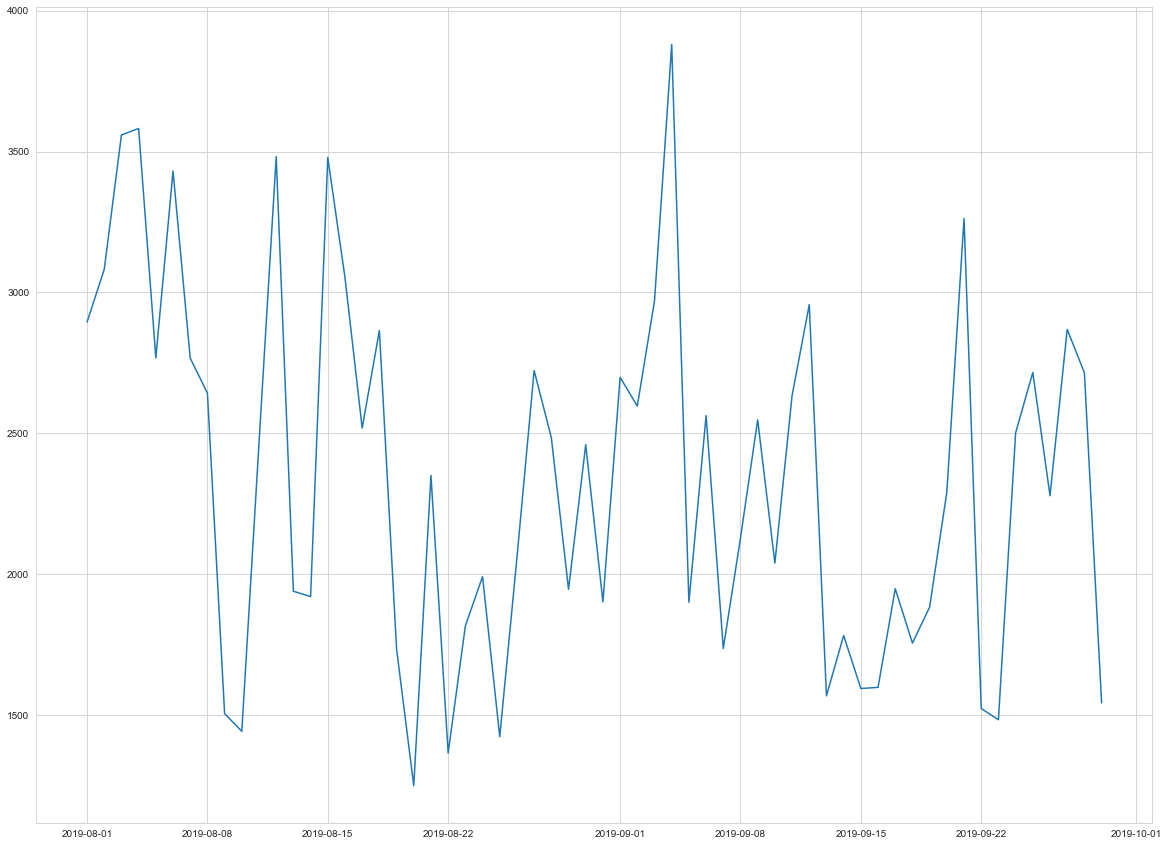

In [304]:
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=sale_day)

## The total number of customers that made an order that day

In [305]:
# Unique customer per day
# list of unique customer_id per day
customers_day_list = merged_order_and_item.groupby("date")["customer_id"].unique()
customers_day_list

date
2019-08-01    [1398, 7449, 7082, 5727, 5281, 9636, 5080, 387...
2019-08-02    [5405, 4212, 4478, 3250, 4014, 408, 9593, 5456...
2019-08-03    [570, 5153, 7902, 6513, 1068, 9656, 8332, 6920...
2019-08-04    [9720, 5224, 8259, 1968, 1284, 6409, 7936, 533...
2019-08-05    [2876, 1549, 9586, 6215, 1843, 7540, 5583, 983...
2019-08-06    [7383, 7479, 8485, 4562, 2024, 5662, 6840, 548...
2019-08-07    [6692, 3666, 7434, 8675, 5717, 8220, 5268, 474...
2019-08-08     [3189, 6350, 9626, 4525, 1278, 4087, 1592, 4914]
2019-08-09                       [1035, 6124, 8790, 4313, 2958]
2019-08-10                       [8825, 4075, 1134, 4030, 5097]
2019-08-11    [6168, 6725, 3502, 5608, 5898, 4904, 5792, 326...
2019-08-12    [7308, 2417, 2870, 58, 94, 9380, 4076, 9915, 7...
2019-08-13                  [3136, 615, 2217, 6217, 4172, 9543]
2019-08-14           [4480, 2829, 6319, 5391, 7249, 2775, 5203]
2019-08-15    [9757, 1081, 184, 4800, 2341, 2303, 2871, 53, ...
2019-08-16     [8032, 8582, 4106, 5

In [306]:
customers_day_list[get_date("2019-08-02")]

array([5405, 4212, 4478, 3250, 4014,  408, 9593, 5456, 4742, 8310])

In [307]:
customers_day_count = pd.Series(
    index=customers_day_list.index, 
    data=[len(v) for v in customers_day_list.values])


Text(0.5, 1.0, 'Unique Customer per day')

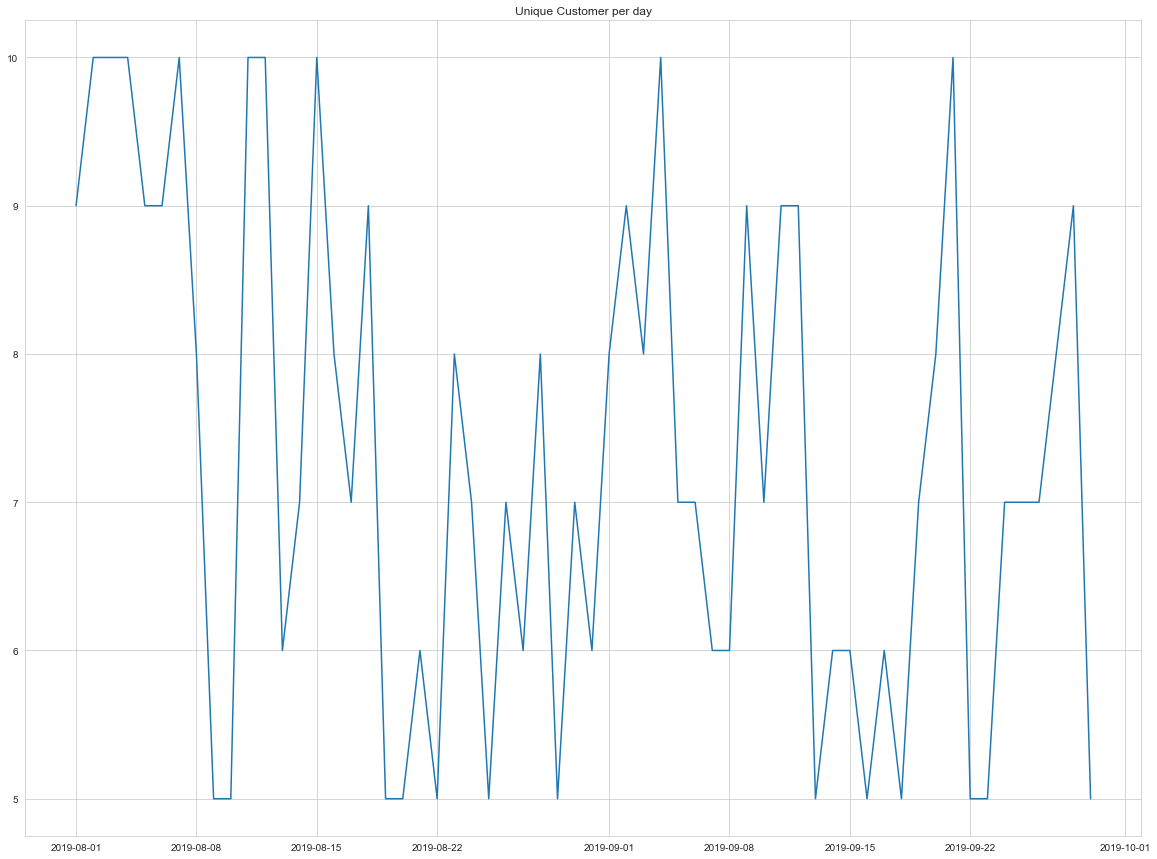

In [308]:
plt.figure(figsize=(20,15))
ax_customer_unique = sns.lineplot(data=customers_day_count)
ax_customer_unique.set_title('Unique Customer per day')

In [309]:
print("Value for the 2019-08-02:", customers_day_count[get_date("2019-08-02")])

Value for the 2019-08-02: 10


## The total amount of discount given that day (using discounted_amount column)

Text(0.5, 1.0, 'Discounted amount per day')

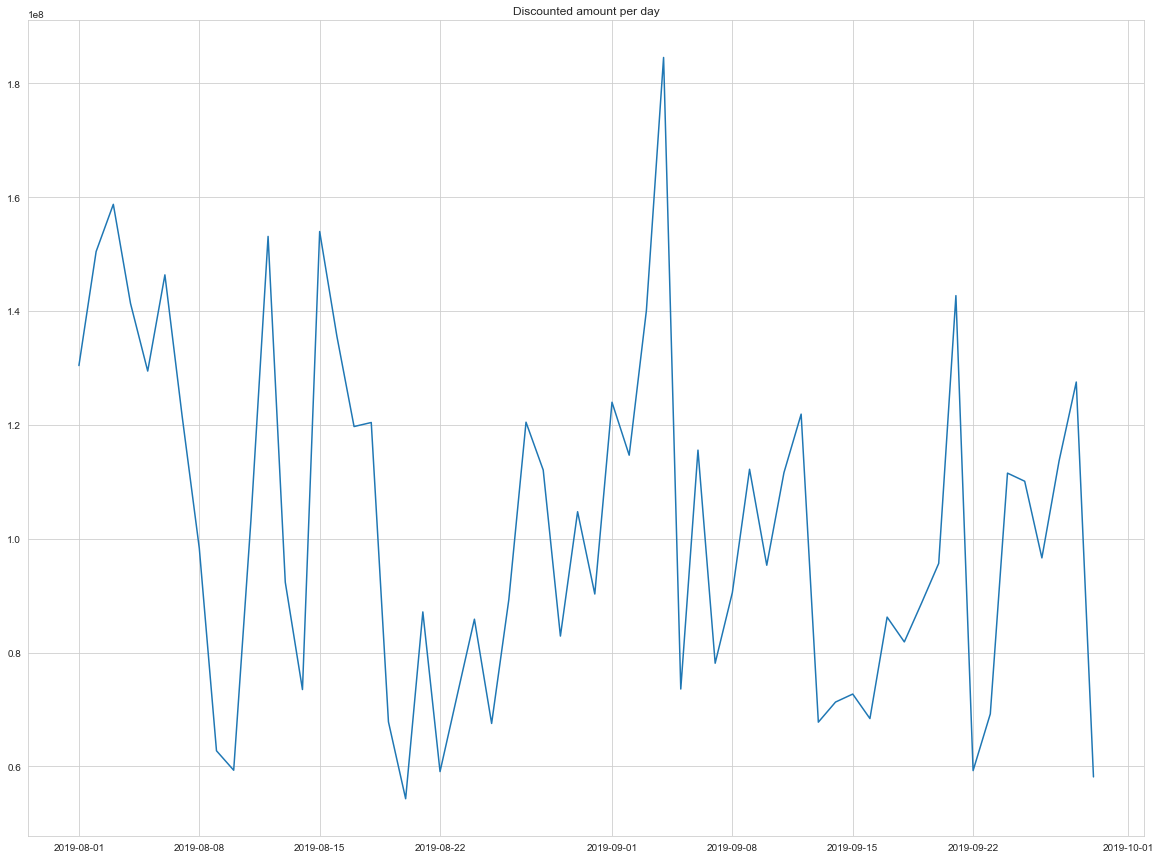

In [310]:
plt.figure(figsize=(20,15))
discounted_day = merged_order_and_item.groupby("date")["discounted_amount"].sum()
ax_discount_amount = sns.lineplot(data=discounted_day)
ax_discount_amount.set_title('Discounted amount per day')

In [311]:
print("Value for the 2019-08-02 ", discounted_day[get_date("2019-08-02")])

Value for the 2019-08-02  150457385.3559189


As we can see 
![First line](./doc/first_line.png)
The discounted amount for a rate value of 0 must be equal to 0!

## The total amount of discount given that day (using discounted_rate column)

In [312]:
# discounted amount
merged_order_and_item["discounted_amount2"] = merged_order_and_item["discount_rate"] * (
    (merged_order_and_item["quantity"] * merged_order_and_item["product_price"]) * (1 + merged_order_and_item["product_vat_rate"])
)
# vat incl
merged_order_and_item["full_price_amount2"] = merged_order_and_item["product_price"] * merged_order_and_item["quantity"] * (1 + merged_order_and_item["product_vat_rate"])
# total
merged_order_and_item["total_amount2"] = merged_order_and_item["full_price_amount2"] * (1 - merged_order_and_item["discount_rate"])



In [313]:
computed_discounted_day = merged_order_and_item.groupby("date")["discounted_amount2"].sum()
computed_total_amount = merged_order_and_item.groupby("date")["total_amount"].sum()

Text(0.5, 1.0, 'Discounted amount (computed) per day')

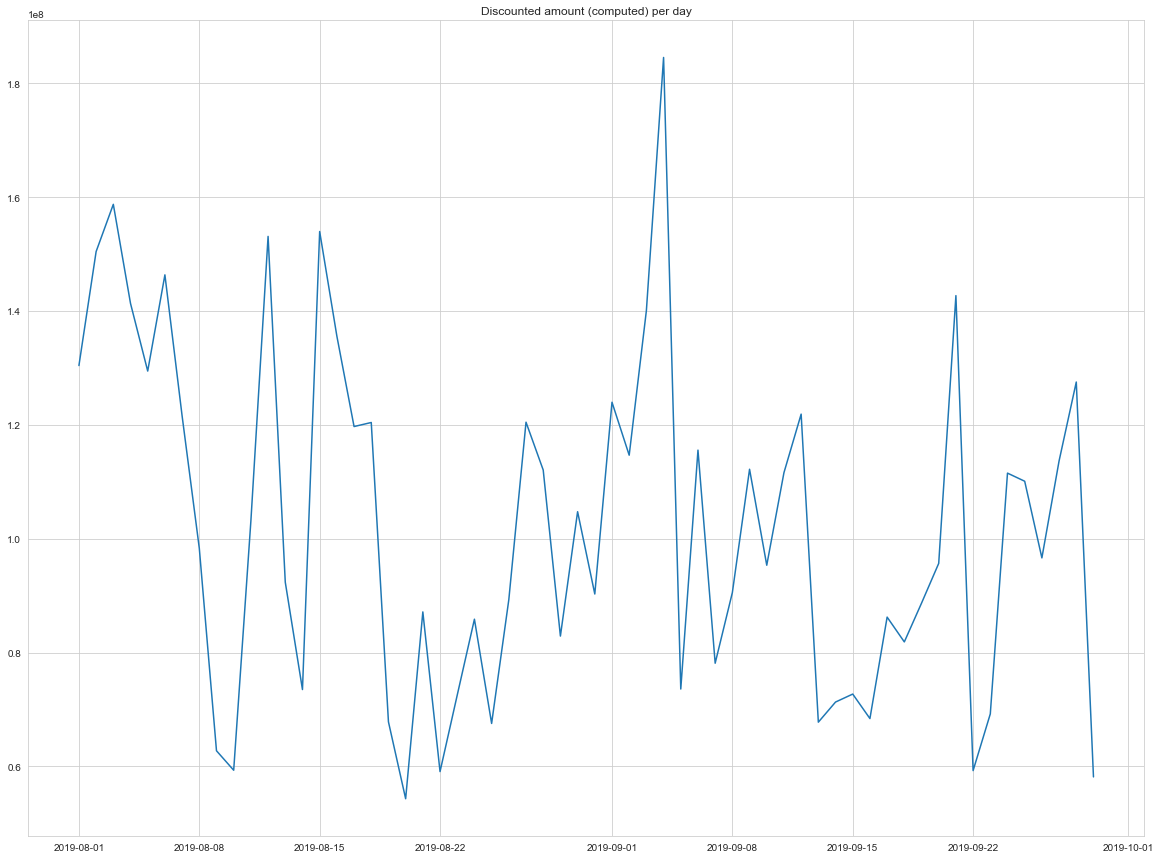

In [314]:
plt.figure(figsize=(20,15))
ax_discount_amount = sns.lineplot(data=discounted_day)
ax_discount_amount.set_title('Discounted amount (computed) per day')

In [315]:

print("Value for the 2019-08-02 of total amount", computed_total_amount[get_date("2019-08-02")])
print("Value for the 2019-08-02 of discounted amount", computed_discounted_day[get_date("2019-08-02")])

print("Value for the 2019-08-02 of % of discount", 
      computed_discounted_day[get_date("2019-08-02")]/computed_total_amount[get_date("2019-08-02")]*100)

Value for the 2019-08-02 of total amount 164998295.76384336
Value for the 2019-08-02 of discounted amount 22328880.0261566
Value for the 2019-08-02 of % of discount 13.53279433753376


## The average discount rate applied to the items sold that day

Text(0.5, 1.0, 'Average discount amount per day')

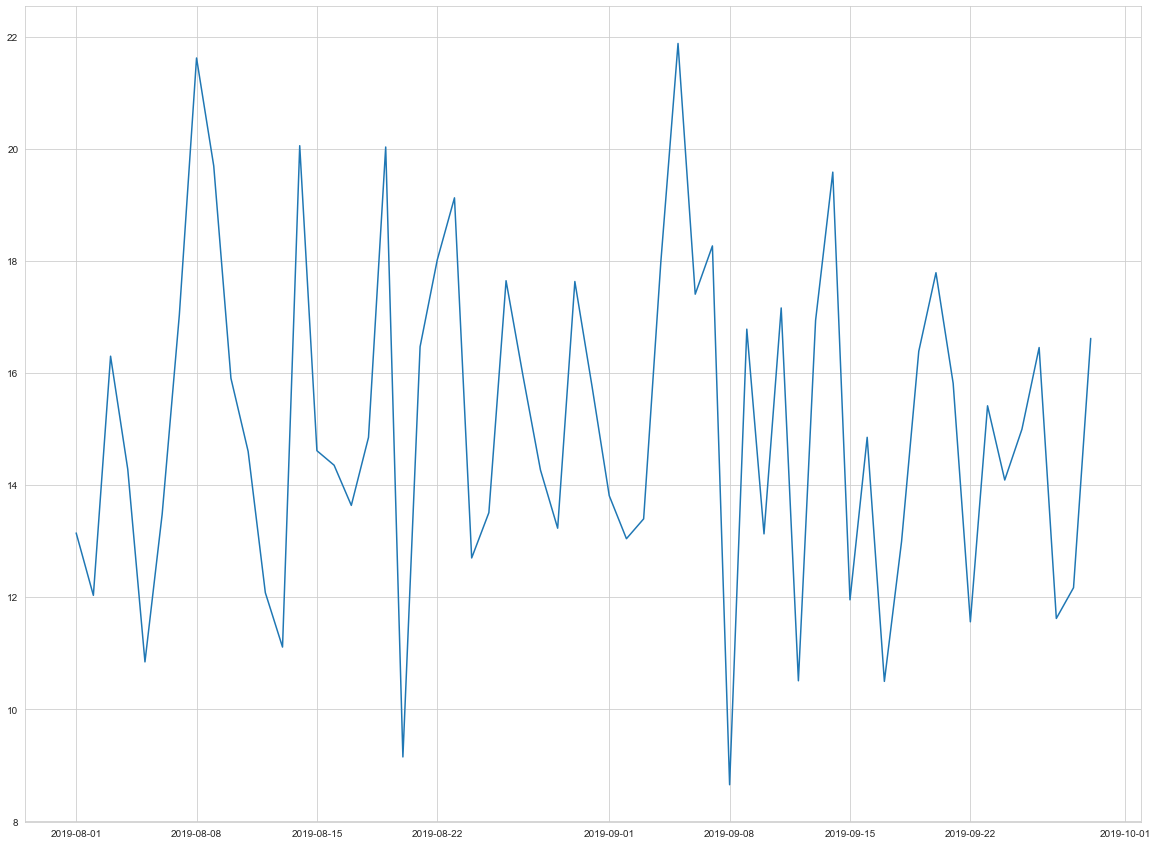

In [316]:
plt.figure(figsize=(20,15))
rate_per_day = merged_order_and_item.groupby("date")["discount_rate"]
quantity_per_day = merged_order_and_item.groupby("date")["quantity"]
sum_per_day =  merged_order_and_item.groupby("date")["quantity"].sum()

merged_order_and_item["weighted_discount_rate"] = merged_order_and_item["discount_rate"] * merged_order_and_item["quantity"] * 100

average_discount_per_day = merged_order_and_item.groupby("date")["weighted_discount_rate"].sum()/sum_per_day 
ax_average_discount = sns.lineplot(data=average_discount_per_day)
ax.set_title('Average discount amount per day')

In [317]:
print("Value for the 2019-08-02 ", average_discount_per_day[get_date("2019-08-02")])

Value for the 2019-08-02  12.032583559680823


## The average order total for that day

In [318]:
plt.figure(figsize=(20,15))
avg_order_total = merged_order_and_item.groupby(["date", "order_id"])["total_amount"].sum()
avg_order_total

date        order_id
2019-08-01  2           2.104800e+07
            3           1.071703e+07
            4           1.095133e+07
            5           1.490744e+07
            6           1.729744e+07
                            ...     
2019-09-29  435         1.021022e+07
            436         1.291581e+07
            437         9.974060e+06
            438         1.500203e+07
            439         1.447381e+07
Name: total_amount, Length: 438, dtype: float64

<Figure size 1440x1080 with 0 Axes>

In [319]:
print("Value for the 2019-08-02:", avg_order_total[get_date("2019-08-02")].mean())


Value for the 2019-08-02: 16499829.576384341


## The average order total for that day (computed)

In [320]:
computed_avg_order_total = merged_order_and_item.groupby(["date", "order_id"])["total_amount2"].sum()


In [321]:
df_order_average = computed_avg_order_total.reset_index()

Text(0.5, 1.0, 'Average total (computed) per day')

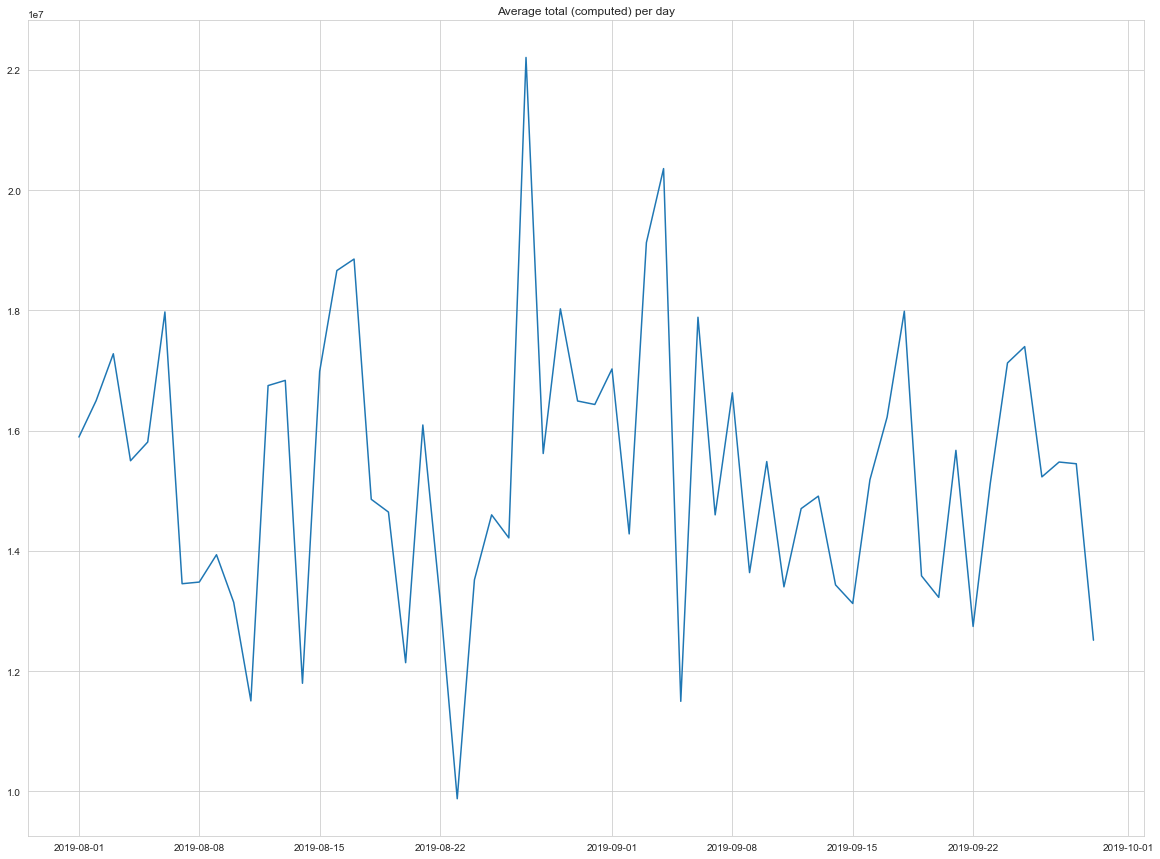

In [322]:
serie_order_average = df_order_average.groupby("date")["total_amount2"].mean()
plt.figure(figsize=(20,15))
ax = sns.lineplot(data=serie_order_average)
ax.set_title('Average total (computed) per day')

In [323]:
print("Value average order for the 2019-08-02 ", serie_order_average[get_date("2019-08-02")].mean())

Value average order for the 2019-08-02  16499829.576384341


## The average amount of commissions per order for that day.

In [324]:
# convert to date obj
commissions_df['date'] = pd.to_datetime(commissions_df['date'], utc=True)
commissions_df['date'] = commissions_df['date'].dt.date

In [325]:
# merge on vendor and date
merged_commission_df = merged_order_and_item.merge(
    commissions_df, how="inner", left_on=["vendor_id", "date"],
    right_on=["vendor_id", "date"]
    
)

In [326]:
merged_commission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5539 entries, 0 to 5538
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   order_id                5539 non-null   int64              
 1   product_id              5539 non-null   int64              
 2   product_description     5539 non-null   object             
 3   product_price           5539 non-null   int64              
 4   product_vat_rate        5539 non-null   float64            
 5   discount_rate           5539 non-null   float64            
 6   quantity                5539 non-null   int64              
 7   full_price_amount       5539 non-null   int64              
 8   discounted_amount       5539 non-null   float64            
 9   vat_amount              5539 non-null   float64            
 10  total_amount            5539 non-null   float64            
 11  id                      5539 non-null   int

In [327]:
merged_commission_df[["order_id", "product_id", "vendor_id","date", "rate"]].head(10)

,order_id,product_id,vendor_id,date,rate
0,2,794,3,2019-08-01,0.27
1,2,780,3,2019-08-01,0.27
2,2,521,3,2019-08-01,0.27
3,2,835,3,2019-08-01,0.27
4,2,580,3,2019-08-01,0.27
5,2,365,3,2019-08-01,0.27
6,2,417,3,2019-08-01,0.27
7,2,462,3,2019-08-01,0.27
8,2,589,3,2019-08-01,0.27
9,2,428,3,2019-08-01,0.27


In [328]:
merged_commission_df["commission_amount"] = merged_commission_df["total_amount2"] * merged_commission_df["rate"]

In [329]:
c = merged_commission_df[["order_id", "rate"]]
c.drop_duplicates().to_csv("order_rate")

In [330]:
# product could have many promotions
merged_promitions_commission_df = merged_commission_df.merge(
    product_promotions_df, how="left", on="product_id"    
)

In [331]:
merged_promitions_commission_df.head(10)

,order_id,product_id,product_description,product_price,product_vat_rate,discount_rate,quantity,full_price_amount,discounted_amount,vat_amount,...,customer_id,date_x,discounted_amount2,full_price_amount2,total_amount2,weighted_discount_rate,rate,commission_amount,date_y,promotion_id
0,2,794,IBM 032,21873,0.11,0.000000,49,1071777,1.071777e+06,117895.470000,...,1398,2019-08-01,0.000000e+00,1189672.47,1.189672e+06,0.000000,0.27,321211.566900,2019-09-22,2.0
1,2,780,IBM 003,94046,0.20,0.761293,29,2727334,6.510325e+05,130206.500079,...,1398,2019-08-01,2.491562e+06,3272800.80,7.812390e+05,2207.750994,0.27,210934.530128,2019-09-24,5.0
2,2,521,Deskjet 995c / 995ck,47082,0.11,0.000000,20,941640,9.416400e+05,103580.400000,...,1398,2019-08-01,0.000000e+00,1045220.40,1.045220e+06,0.000000,0.27,282209.508000,2019-08-08,1.0
3,2,521,Deskjet 995c / 995ck,47082,0.11,0.000000,20,941640,9.416400e+05,103580.400000,...,1398,2019-08-01,0.000000e+00,1045220.40,1.045220e+06,0.000000,0.27,282209.508000,2019-08-21,4.0
4,2,835,A388C (Accompli 388),55162,0.00,0.000000,50,2758100,2.758100e+06,0.000000,...,1398,2019-08-01,0.000000e+00,2758100.00,2.758100e+06,0.000000,0.27,744687.000000,2019-08-01,5.0
5,2,580,Officejet 330,15927,0.11,0.000000,46,732642,7.326420e+05,80590.620000,...,1398,2019-08-01,0.000000e+00,813232.62,8.132326e+05,0.000000,0.27,219572.807400,2019-09-09,2.0
6,2,365,QM3,33152,0.20,0.000000,11,364672,3.646720e+05,72934.400000,...,1398,2019-08-01,0.000000e+00,437606.40,4.376064e+05,0.000000,0.27,118153.728000,NaN,NaN
7,2,417,GS8,96066,0.11,0.000000,22,2113452,2.113452e+06,232479.720000,...,1398,2019-08-01,0.000000e+00,2345931.72,2.345932e+06,0.000000,0.27,633401.564400,2019-08-14,2.0
8,2,417,GS8,96066,0.11,0.000000,22,2113452,2.113452e+06,232479.720000,...,1398,2019-08-01,0.000000e+00,2345931.72,2.345932e+06,0.000000,0.27,633401.564400,2019-08-30,5.0
9,2,462,Deskjet 610c / 610cl,1037,0.20,0.522203,33,34221,1.635069e+04,3270.137627,...,1398,2019-08-01,2.144437e+04,41065.20,1.962083e+04,1723.270190,0.27,5297.622955,NaN,NaN


In [332]:
merged_promitions_commission_df.to_csv(data_folder.joinpath("merged_promitions_commission_df.csv"))

## The total amount of commissions earned per promotion that day

In [333]:
commission_per_day_promotion = merged_promitions_commission_df.groupby(["date_x", "promotion_id"])['commission_amount'].sum()

In [334]:
print("Value for the 2019-08-02 ", commission_per_day_promotion[get_date("2019-08-02")])

Value for the 2019-08-02  promotion_id
1.0    3.450771e+06
2.0    3.910229e+06
3.0    3.223223e+06
4.0    1.799488e+06
5.0    2.466813e+06
Name: commission_amount, dtype: float64


In [335]:
commission_per_day_promotion_df = commission_per_day_promotion.reset_index()
commission_per_day_promotion_df.head(10)

,date_x,promotion_id,commission_amount
0,2019-08-01,1.0,1.924987e+06
1,2019-08-01,2.0,4.257367e+06
2,2019-08-01,3.0,2.797487e+06
3,2019-08-01,4.0,3.149130e+06
4,2019-08-01,5.0,4.393966e+06
5,2019-08-02,1.0,3.450771e+06
6,2019-08-02,2.0,3.910229e+06
7,2019-08-02,3.0,3.223223e+06
8,2019-08-02,4.0,1.799488e+06
9,2019-08-02,5.0,2.466813e+06


<Figure size 1800x720 with 0 Axes>

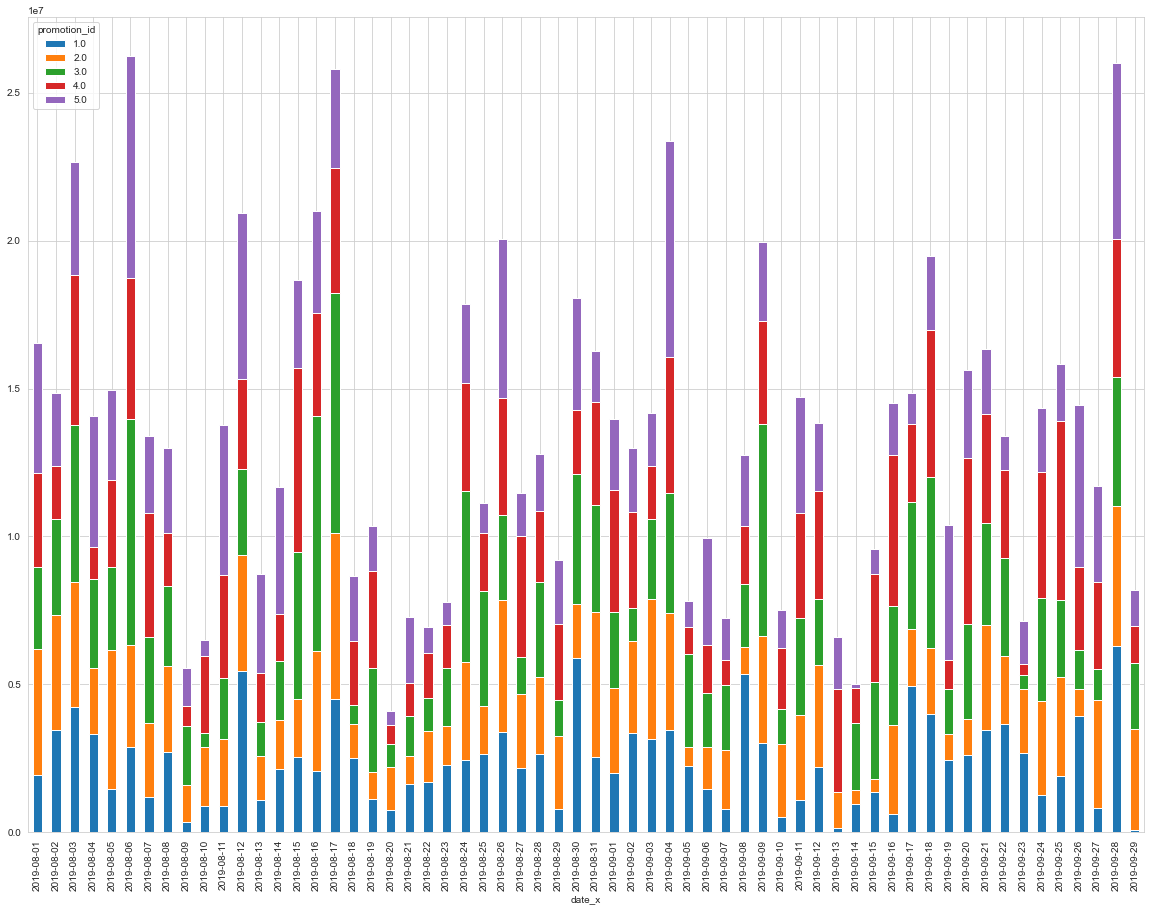

In [336]:
plt.figure(figsize=(25,10))
commission_per_day_promotion_df_pivot = commission_per_day_promotion_df.pivot(index="date_x", columns="promotion_id", values="commission_amount")
commission_per_day_promotion_df_pivot.plot.bar(figsize=(20,15), stacked=True)

## The total amount of commissions generated that day

In [337]:
commission_per_day = merged_commission_df.groupby("date")['commission_amount'].sum()
n_order_per_day = merged_commission_df.groupby("date")['order_id'].nunique()

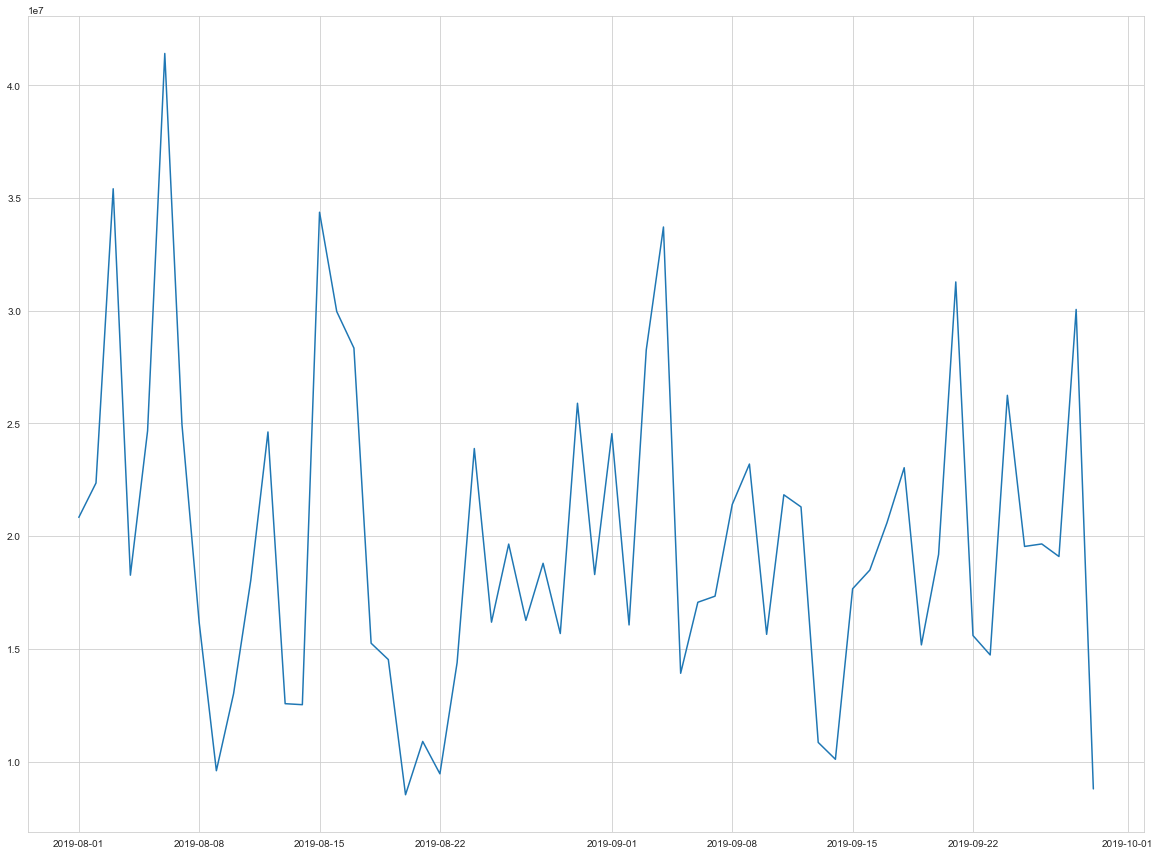

In [338]:
plt.figure(figsize=(20,15))
ax_commission_amount = sns.lineplot(data=commission_per_day)

In [339]:
print("Value for the 2019-08-02 ", commission_per_day[get_date("2019-08-02")])

Value for the 2019-08-02  22358623.32815922


## The average amount of commissions per order for that day

In [340]:
commission_per_day_per_order_avg = commission_per_day/n_order_per_day

In [341]:
commission_per_day_per_order_avg.head(10)

date
2019-08-01    2.314804e+06
2019-08-02    2.235862e+06
2019-08-03    3.541195e+06
2019-08-04    1.826894e+06
2019-08-05    2.741504e+06
2019-08-06    4.601626e+06
2019-08-07    2.494845e+06
2019-08-08    2.021629e+06
2019-08-09    1.918779e+06
2019-08-10    2.601964e+06
dtype: float64

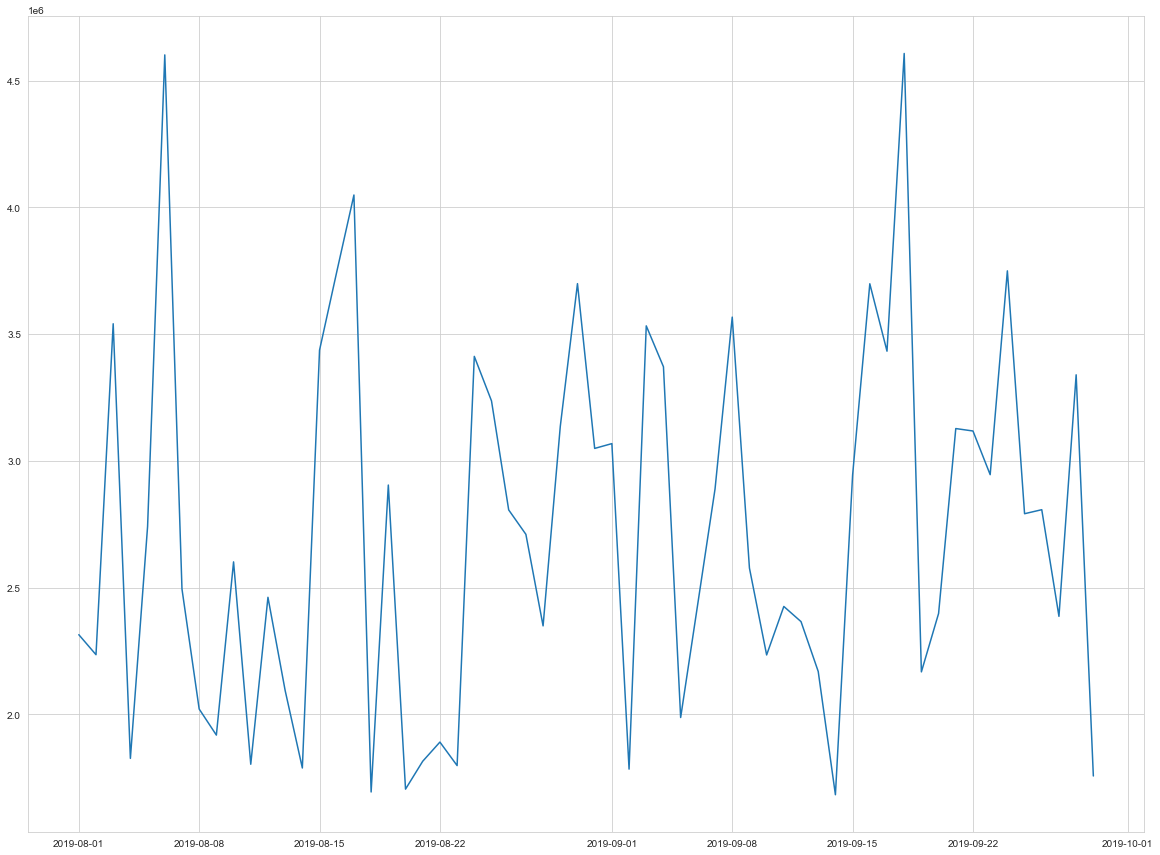

In [342]:
plt.figure(figsize=(20,15))
ax_avg_commission_order = sns.lineplot(data=commission_per_day_per_order_avg)

In [343]:
print("Value for the 2019-08-02 ", commission_per_day_per_order_avg[get_date("2019-08-02")])

Value for the 2019-08-02  2235862.332815922


In [344]:
# save data
merged_order_and_item.head(20)
merged_order_and_item.to_csv(data_folder.joinpath("merged_orders_items.csv"))
merged_commission_df.to_csv(data_folder.joinpath("merged_commissions.csv"))

In [345]:
def get_report(order_items_df, average_discount_per_day, commission_per_day_promotion, commission_per_day, report_day):
    """ report for the day """
    order_items_df_day_grouped = order_items_df.groupby("date")
    day = get_date(report_day)
    n_orders = len(order_items_df_day_grouped["order_id"].unique()[day])
    total_commission = commission_per_day[day]
    return {
        "created_at": report_day,
        "items": order_items_df_day_grouped["quantity"].sum()[day],
        "consumers": len(order_items_df_day_grouped["customer_id"].unique()[day]),
        "orders": n_orders,
        "total_discount_amount": order_items_df_day_grouped["discounted_amount2"].sum()[day], 
        "discount_rate_avg": average_discount_per_day[day],
        "order_total_avg": order_items_df.groupby(["date", "order_id"])["total_amount2"].sum().reset_index().groupby('date')["total_amount2"].mean()[day],
        "commission": {
            "promotion": commission_per_day_promotion[day].to_dict(),
            "total": commission_per_day[day],
            "order_average": total_commission/n_orders
        }

    }
    

In [346]:
get_report(merged_order_and_item, 
           average_discount_per_day, 
           commission_per_day_promotion,
           commission_per_day,
           "2019-08-02")

{'created_at': '2019-08-02',
 'items': 3082,
 'consumers': 10,
 'orders': 10,
 'total_discount_amount': 22328880.0261566,
 'discount_rate_avg': 12.032583559680823,
 'order_total_avg': 16499829.576384341,
 'commission': {'promotion': {1.0: 3450771.3463750053,
   2.0: 3910229.3849747377,
   3.0: 3223223.36818836,
   4.0: 1799487.7245473298,
   5.0: 2466812.5566847064},
  'total': 22358623.32815922,
  'order_average': 2235862.332815922}}

## Discussion
Since product could have many promotions at the same time (I was not able to make promotion unique againsts product). This counduct to repeat the same amount over the promotion code. Thus results about promotions should be take carefully. 